In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f"PyTorch version: {torch.__version__}"

'PyTorch version: 2.8.0+cu128'

# Tensor
- 텐서는 PyTorch에서 기본이 되는 데이터 구조로, NumPy 배열과 유사하지만 GPU 가속과 자동 미분 같은 추가 기능을 제공.

## 생성

In [3]:
# 리스트에서 생성
tensor = torch.tensor([1, 2, 3, 4])
tensor_matrix = torch.tensor([[1, 2], [3, 4]])

print(f"[+] Tensor from list: {tensor}, Type: {type(tensor)} {tensor.dtype}")
print(f"[+] Matrix: {tensor_matrix}, Type: {type(tensor_matrix)} {tensor_matrix.dtype}")

[+] Tensor from list: tensor([1, 2, 3, 4]), Type: <class 'torch.Tensor'> torch.int64
[+] Matrix: tensor([[1, 2],
        [3, 4]]), Type: <class 'torch.Tensor'> torch.int64


In [4]:
# 데이터 타입 지정하여 생성
tensor_float = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
tensor_int = torch.tensor([1, 2, 3], dtype=torch.int64)

print(f"[+] Float tensor: {tensor_float}, Type: {type(tensor_float)} {tensor_float.dtype}")
print(f"[+] Integer tensor: {tensor_int}, Type: {type(tensor_int)} {tensor_int.dtype}")

[+] Float tensor: tensor([1., 2., 3.]), Type: <class 'torch.Tensor'> torch.float32
[+] Integer tensor: tensor([1, 2, 3]), Type: <class 'torch.Tensor'> torch.int64


In [5]:
# NumPy에서 생성
np_array = np.array([1, 2, 3, 4], dtype=np.float16)
tensor_np = torch.from_numpy(np_array)
np_recover = tensor_np.numpy()

print(f"[+] Tensor: {tensor_np}, Type: {type(tensor_np)} {tensor_np.dtype}")
print(f"[+] Numpy Recover: {np_recover}, Type: {type(np_recover)} {np_recover.dtype}")

[+] Tensor: tensor([1., 2., 3., 4.], dtype=torch.float16), Type: <class 'torch.Tensor'> torch.float16
[+] Numpy Recover: [1. 2. 3. 4.], Type: <class 'numpy.ndarray'> float16


In [6]:
# 메모리를 공유함
tensor_np[0] = 10
np_array[1] = 20
np_recover[2] = 30
print(f"[+] Tensor: {tensor_np}, Type: {type(tensor_np)} {tensor_np.dtype}")
print(f"[+] Numpy Original: {np_array}, Type: {type(np_array)} {np_array.dtype}")
print(f"[+] Numpy Recover: {np_recover}, Type: {type(np_recover)} {np_recover.dtype}")

[+] Tensor: tensor([10., 20., 30.,  4.], dtype=torch.float16), Type: <class 'torch.Tensor'> torch.float16
[+] Numpy Original: [10. 20. 30.  4.], Type: <class 'numpy.ndarray'> float16
[+] Numpy Recover: [10. 20. 30.  4.], Type: <class 'numpy.ndarray'> float16


In [7]:
# shape지정하여 무작위/상수 생성
tensor_zeros = torch.zeros(3, 4, dtype=torch.int8)
tensor_ones = torch.ones(2, 3)
tensor_rand = torch.rand(2, 2)  # Uniform distribution [0, 1)
tensor_randn = torch.randn(2, 2)  # Normal distribution (mean=0, std=1)

print(f"[+] Zeros tensor: {tensor_zeros}, Type: {type(tensor_zeros)} {tensor_zeros.dtype}")
print(f"[+] Ones tensor: {tensor_ones}, Type: {type(tensor_ones)} {tensor_ones.dtype}")
print(f"[+] Random uniform tensor: {tensor_rand}, Type: {type(tensor_rand)} {tensor_rand.dtype}")
print(f"[+] Random normal tensor: {tensor_randn}, Type: {type(tensor_randn)} {tensor_randn.dtype}")

[+] Zeros tensor: tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int8), Type: <class 'torch.Tensor'> torch.int8
[+] Ones tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]]), Type: <class 'torch.Tensor'> torch.float32
[+] Random uniform tensor: tensor([[0.2174, 0.6555],
        [0.9417, 0.2256]]), Type: <class 'torch.Tensor'> torch.float32
[+] Random normal tensor: tensor([[-1.2360,  0.3177],
        [-0.0731,  0.4383]]), Type: <class 'torch.Tensor'> torch.float32


In [8]:
# 다른 Tensor의 shape과 datatype을 유지하여 생성.
tensor_zeros_like = torch.zeros_like(tensor_matrix)
tensor_ones_like = torch.ones_like(tensor_zeros)
tensor_rand_like = torch.rand_like(tensor_np)
tensor_randn_like = torch.randn_like(tensor_np)

print(f"[+] Zeros tensor: {tensor_zeros_like}, Type: {type(tensor_zeros_like)} {tensor_zeros_like.dtype}")
print(f"[+] Ones tensor: {tensor_ones_like}, Type: {type(tensor_ones_like)} {tensor_ones_like.dtype}")
print(f"[+] Random uniform tensor: {tensor_rand_like}, Type: {type(tensor_rand_like)} {tensor_rand_like.dtype}")
print(f"[+] Random normal tensor: {tensor_randn_like}, Type: {type(tensor_randn_like)} {tensor_randn_like.dtype}")

[+] Zeros tensor: tensor([[0, 0],
        [0, 0]]), Type: <class 'torch.Tensor'> torch.int64
[+] Ones tensor: tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int8), Type: <class 'torch.Tensor'> torch.int8
[+] Random uniform tensor: tensor([0.4731, 0.8081, 0.5586, 0.2056], dtype=torch.float16), Type: <class 'torch.Tensor'> torch.float16
[+] Random normal tensor: tensor([-0.2324,  0.5640,  2.0293,  0.3242], dtype=torch.float16), Type: <class 'torch.Tensor'> torch.float16


## 속성

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [10]:
tensor_cpu = torch.randn(3, 4, 5)
tensor_gpu = torch.randn(3, 4, 5).to(device)

print(f"[+] Tensor shape: {tensor_cpu.shape}")
print(f"[+] Tensor size: {tensor_cpu.size()}")
print(f"[+] Number of dimensions: {tensor_cpu.dim()}")
print(f"[+] Data type: {tensor_cpu.dtype}")
print(f"[+] Device: {tensor_cpu.device}")
print(f"[+] Device: {tensor_gpu.device}")

[+] Tensor shape: torch.Size([3, 4, 5])
[+] Tensor size: torch.Size([3, 4, 5])
[+] Number of dimensions: 3
[+] Data type: torch.float32
[+] Device: cpu
[+] Device: cuda:0


## Indexing & Slicing

In [11]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [12]:
# Indexing
print(f"x[0, 0] = {x[0, 0]}")
print(f"x[1, 2] = {x[1, 2]}")

x[0, 0] = 1
x[1, 2] = 6


In [13]:
print(f"[+] First column as row:\n{x[:, 0]}\n")
print(f"[+] First column as column:\n{x[:, 0:1]}\n")
print(f"[+] Second row:\n{x[1, :]}\n")
print(f"[+] Sub-matrix (top-right 2x2):\n{x[0:2, 1:3]}")

[+] First column as row:
tensor([1, 4, 7])

[+] First column as column:
tensor([[1],
        [4],
        [7]])

[+] Second row:
tensor([4, 5, 6])

[+] Sub-matrix (top-right 2x2):
tensor([[2, 3],
        [5, 6]])


In [14]:
mask = x > 5
print(f"\nBoolean mask (x > 5):\n{mask}")
print(f"Elements where x > 5:\n{x[mask]}")


Boolean mask (x > 5):
tensor([[False, False, False],
        [False, False,  True],
        [ True,  True,  True]])
Elements where x > 5:
tensor([6, 7, 8, 9])


# Tensor 연산

## 산술연산

In [15]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.tensor([1, 1, 1])

print("[+] Addition")
print(f"a + b + c = {a + b + c}")
print(f"torch.add(a, b).add(c) = {torch.add(a, b).add(c)}")

print("\n[+] Subtraction")
print(f"a - b = {a - b}")
print(f"torch.sub(a, b) = {torch.sub(a, b)}")

print("\n[+] Element-wise Multiplication")
print(f"a * b = {a * b}")
print(f"torch.mul(a, b) = {torch.mul(a, b)}")

print("\n[+] Element-wise Division")
print(f"a / b = {a / b}")
print(f"torch.div(a, b) = {torch.div(a, b)}")

[+] Addition
a + b + c = tensor([ 6,  8, 10])
torch.add(a, b).add(c) = tensor([ 6,  8, 10])

[+] Subtraction
a - b = tensor([-3, -3, -3])
torch.sub(a, b) = tensor([-3, -3, -3])

[+] Element-wise Multiplication
a * b = tensor([ 4, 10, 18])
torch.mul(a, b) = tensor([ 4, 10, 18])

[+] Element-wise Division
a / b = tensor([0.2500, 0.4000, 0.5000])
torch.div(a, b) = tensor([0.2500, 0.4000, 0.5000])


In [16]:
# In-place operations (modifies the tensor)
d = torch.tensor([1, 2, 3])
print(f"[+] Original d = {d}")

d.add_(b)  # underscore suffix : in-place operations
print(f"[+] After d.add_(b), d = {d}")

[+] Original d = tensor([1, 2, 3])
[+] After d.add_(b), d = tensor([5, 7, 9])


## Matrix 연산

In [17]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

print(f"[+] Matrix a:\n{a}")
print(f"[+] Matrix b:\n{b}")

# Matrix multiplication
print(f"\nMatrix multiplication (torch.matmul(a, b)):\n{torch.matmul(a, b)}")
print(f"Matrix multiplication (a @ b):\n{a @ b}")

[+] Matrix a:
tensor([[1, 2],
        [3, 4]])
[+] Matrix b:
tensor([[5, 6],
        [7, 8]])

Matrix multiplication (torch.matmul(a, b)):
tensor([[19, 22],
        [43, 50]])
Matrix multiplication (a @ b):
tensor([[19, 22],
        [43, 50]])


In [18]:
# Transpose
print(f"\nTranspose of a:\n{a.t()}\n{a.T}")


Transpose of a:
tensor([[1, 3],
        [2, 4]])
tensor([[1, 3],
        [2, 4]])


In [19]:
# Determinant : 행렬식
print(f"Determinant of a: {torch.det(a.float())}")

# Inverse : 역행렬
print(f"Inverse of a:\n{torch.inverse(a.float())}")

Determinant of a: -2.0
Inverse of a:
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])


## Reduction 연산

In [20]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [21]:
# Sum
print(f"[+] Sum of all elements: {torch.sum(x)}")
print(f"[+] Sum along rows (dim=0): {x.sum(dim=0)}")
print(f"[+] Sum along columns (dim=1): {x.sum(dim=1)}")

[+] Sum of all elements: 21
[+] Sum along rows (dim=0): tensor([5, 7, 9])
[+] Sum along columns (dim=1): tensor([ 6, 15])


In [22]:
# Max and Min
print(f"[+] Max of all elements: {torch.max(x)}")
max_values, max_indices = x.max(dim=0)
print(f"[+] Max along rows (dim=0): values={max_values}, indices={max_indices}")
print(f"[+] Min of all elements: {torch.min(x)}")

[+] Max of all elements: 6
[+] Max along rows (dim=0): values=tensor([4, 5, 6]), indices=tensor([1, 1, 1])
[+] Min of all elements: 1


In [23]:
# Product
print(f"[+] Product of all elements: {torch.prod(x)}")
print(f"[+] Product along rows (dim=0): {x.prod(dim=0)}")

[+] Product of all elements: 720
[+] Product along rows (dim=0): tensor([ 4, 10, 18])


# GPU 사용

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [25]:
# Create tensor directly on GPU
x_gpu = torch.tensor([1, 2, 3], device=device)
print(f"[+] Tensor created on GPU: {x_gpu}")

[+] Tensor created on GPU: tensor([1, 2, 3], device='cuda:0')


In [26]:
# Move tensor from CPU to GPU
x_cpu = torch.tensor([4, 5, 6])
x_gpu = x_cpu.to(device)
print(f"[+] Tensor moved from CPU to GPU: {x_gpu}")

[+] Tensor moved from CPU to GPU: tensor([4, 5, 6], device='cuda:0')


In [27]:
# Move tensor back to CPU
x_cpu_again = x_gpu.cpu()
print(f"[+] Tensor moved back to CPU: {x_cpu_again}")

[+] Tensor moved back to CPU: tensor([4, 5, 6])


# Computational Graphs

In [28]:
# Create tensors with requires_grad=True to track operations
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

print(f"x = {x}, y = {y}")

x = 2.0, y = 3.0


In [29]:
# Build a computational graph
z = x**2 + y**3
print(f"z = x^2 + y^3 = {z}")

z = x^2 + y^3 = 31.0


In [30]:
# Compute gradients
z.backward()

print(f"Gradient of z with respect to x (dz/dx): {x.grad}")
print(f"Gradient of z with respect to y (dz/dy): {y.grad}")

Gradient of z with respect to x (dz/dx): 4.0
Gradient of z with respect to y (dz/dy): 27.0


## Gradient accumulation

In [31]:
# grad 초기화 (파이토치는 grad를 누적합니다!)
x.grad.zero_()
y.grad.zero_()
print(f"x.grad = {x.grad}")
print(f"y.grad = {y.grad}")

x.grad = 0.0
y.grad = 0.0


In [32]:
# backward()가 끝나면, x.grad와 y.grad에 각각 ∂z/∂x, ∂z/∂y가 "누적"됩니다.
# 그리고 사용된 그래프는 기본 설정상 메모리에서 해제됩니다(free).
z = x**2 + y**3
z.backward()
print(f"After first backward pass:")
print(f"x.grad = {x.grad}")

After first backward pass:
x.grad = 4.0


In [33]:
# backward()가 끝나면, x.grad와 y.grad에 각각 ∂z/∂x, ∂z/∂y가 "누적"됩니다.
# 그리고 사용된 그래프는 기본 설정상 메모리에서 해제됩니다(free).
z = x**2 + y**3
z.backward()
print(f"After first backward pass:")
print(f"x.grad = {x.grad}")

After first backward pass:
x.grad = 8.0


## Detach a tensor from the graph

In [34]:
z.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [35]:
a = x.detach()
print(f"Detached tensor a = {a}")
print(f"a.requires_grad = {a.requires_grad}")

Detached tensor a = 2.0
a.requires_grad = False


In [36]:
z.detach().numpy()

array(31., dtype=float32)

# Gradient Visualization

In [37]:
# Create a range of x values
x_range = torch.linspace(-3, 3, 100, requires_grad=True)

In [38]:
# Define a function: f(x) = x^2
y = x_range**2

In [39]:
# Compute gradients for each x value
gradients = []
for i in range(len(x_range)):
    if x_range.grad is not None:
        x_range.grad.zero_()
    y_i = x_range[i]**2
    y_i.backward()
    gradients.append(x_range.grad[i].item())

In [40]:
# Convert to NumPy for plotting
x_np = x_range.detach().numpy()
y_np = y.detach().numpy()
gradients_np = np.array(gradients)

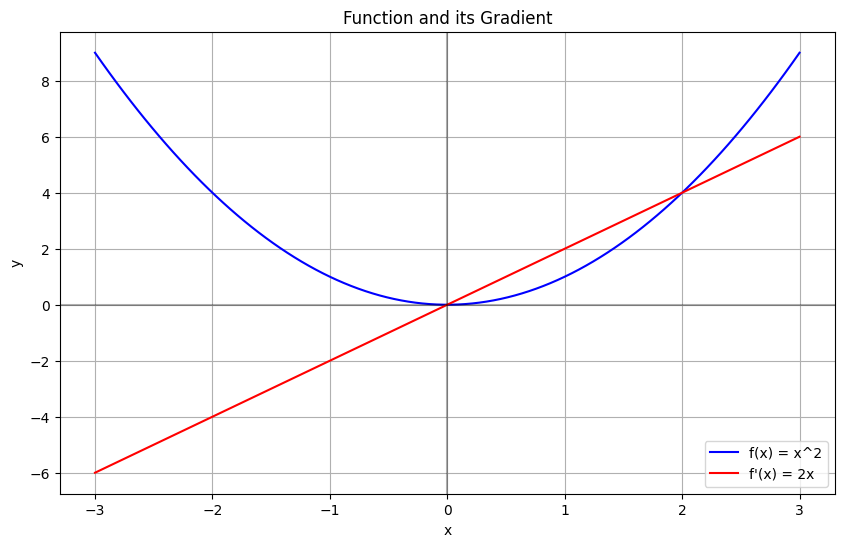

In [41]:
# Plot the function and its gradient
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, 'b-', label='f(x) = x^2')
plt.plot(x_np, gradients_np, 'r-', label="f'(x) = 2x")
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Gradient')
plt.legend()
plt.show()